In [1]:
import random
import pandas as pd

In [2]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(3*x*x+2*y+3*x*y+4*x+6*y+4*z+99)

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [4]:
X = df.iloc[:,0:3]
Y = df.iloc[:,3]

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

2023-11-30 12:52:24.421052: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
model = tf.keras.models.Sequential([  
  tf.keras.layers.Dense(9,input_dim=3, activation='relu'),
  tf.keras.layers.Dense(9, activation='relu'),
  tf.keras.layers.Dense(15, activation='relu'),
  tf.keras.layers.Dense(9, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 2s 1ms/step - loss: 1816.4132 - accuracy: 0.0000e+00
Epoch 2/50
1250/1250 [==============================] - 2s 1ms/step - loss: 12.8401 - accuracy: 0.0000e+00
Epoch 3/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1197 - accuracy: 0.0000e+00
Epoch 4/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1135 - accuracy: 0.0000e+00
Epoch 5/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1152 - accuracy: 0.0000e+00
Epoch 6/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1177 - accuracy: 0.0000e+00
Epoch 7/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1239 - accuracy: 0.0000e+00
Epoch 8/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1272 - accuracy: 0.0000e+00
Epoch 9/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1257 - accuracy: 0.0000e+00
Epoch 10/50
1250/1250 [===================

In [11]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 870us/step


In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_pred, y_test)

0.9940121245579387

In [27]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

<Axes: >

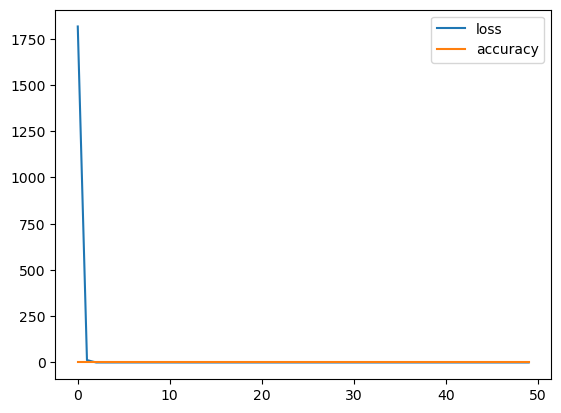

In [30]:
metrics_df = pd.DataFrame(model.history.history)
metrics_df.plot()

In [20]:
metrics_df.head()

,loss,accuracy
0,0.094703,0.0
1,0.095365,0.0
2,0.095130,0.0
3,0.094510,0.0
4,0.093883,0.0
